# Fraud Detection In Mobile Financial Transactions

## Dataset Overview:

**Fraud Detection Dataset**
- **Description**: A structured fraud analysis dataset containing transactional, customer, and behavioral attributes to identify and study fraudulent activities.
- **Columns**:
- **Purpose**: To enable detection, analysis, and prevention of fraudulent financial transactions using data-driven techniques.
- **Applications**: Fraud detection systems, risk management, anomaly detection, financial security analytics, and machine learning model training.
- **Analysis Tasks**: Data cleaning, exploratory data analysis (EDA), fraud pattern identification, feature engineering, and predictive modeling.
- **Relevance**: Highly relevant for finance, banking, cybersecurity, and data science domains focused on fraud prevention and risk assessment.

---

### Learning Objectives:
- To study the literature on mobile financial fraud detection and understand the different
aspects of the problem.
- To solve the problem of mobile financial fraud detection on a publicly available sample
dataset using supervised machine learning techniques.
- To compare different classification techniques to understand which is best
suitable for this application.


### Key Concepts I Learn:
- **Data Preprocessing**: Handling missing values, outliers, and data normalization
- **Exploratory Data Analysis**: Identifying trends, correlations, and fraud indicators
- **Fraud Detection Techniques**: Rule-based methods, anomaly detection, and classification models
- **Feature Engineering**: Creating meaningful variables to improve fraud prediction
- **Model Evaluation**: Accuracy, precision, recall, F1-score, and ROC-AUC analysis



## Step 1: Importing Essential Libraries

**Foundational Concept**: In data science, we use specialized libraries for different tasks:
- **NumPy**: Numerical computations and array operations
- **Pandas**: Data manipulation and analysis
- **Matplotlib/Seaborn**: Data visualization
- **Scikit-learn**: Machine learning algorithms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Step 2: Loading and Initial Data Inspection

**Key Concept**: Always start with understanding your data structure, size, and basic characteristics before any analysis.

In [60]:
#load data
df=pd.read_csv('Fraud_Analysis_Dataset.csv')
print("\nFirst 5 Rows:\n",display(df.head(15))) # first 5 rows
print("\nLast  5 Rows:\n",display(df.tail()))  # last  5 rows
print("\nShape:\n",df.shape) # no.of rowa and columns

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
5,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1
6,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1
7,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1
8,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1
9,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1



First 5 Rows:
 None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0



Last  5 Rows:
 None

Shape:
 (11142, 10)


## Step 3: Data Preprocessing & Exploratory Data Analysis (EDA)

**Foundational Concept**: EDA is the process of analyzing and investigating datasets to discover patterns, spot anomalies, and check assumptions through statistical graphics and other data visualization methods.

In [4]:
## shape of the dataset(row and columns)
print("\nShape:\n",df.shape)


Shape:
 (11142, 10)


In [5]:
## data type of columns
print("\nData Types:\n",df.dtypes)


Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object


In [6]:
# basic statistical summary
print("\nStatistical Summary:\n",display(df.describe()))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000



Statistical Summary:
 None


In [7]:
print("\nData Information:\n",(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB

Data Information:
 None


In [8]:
# finding missing values
print("\nMissimg Values:\n",df.isnull().sum())


Missimg Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


###### There Is No Missing Values In This Dataset.


In [9]:
# finding duplicate values
print("\nDuplicate Values:\n",df.duplicated().sum())


Duplicate Values:
 0


###### There Are No Duplicate Values In This Dataset.

## 3.1  Class Imbalance

In [10]:
df.isFraud.value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

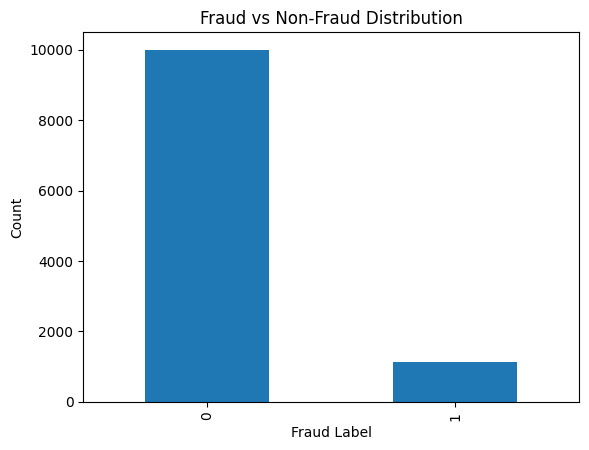

In [11]:
# count of non-fraud vs fraud distribution
plt.figure()
df['isFraud'].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Fraud Label")
plt.ylabel("Count")
plt.show()

## Note:

- **1**: Here we can see that the 'Target Variable' is Imbalance.
- **2**: 0 Refer's to the Non-Fraud Tranctions.
- **3**: 1 Refer's to the Fraud Transctions.

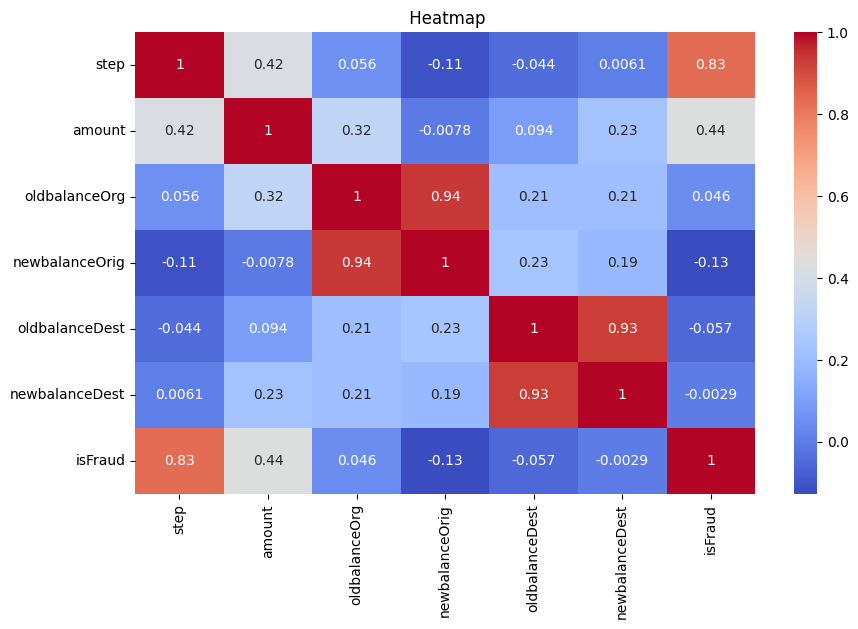

In [64]:
numeric_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title(" Heatmap")
plt.show()


## 3.2 Types of Transaction

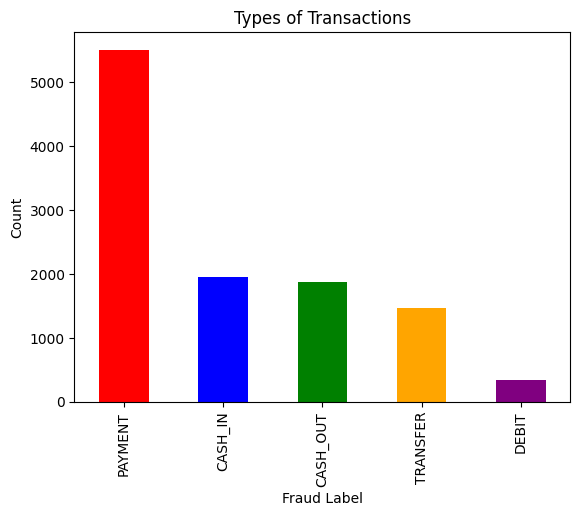

In [12]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure()
df['type'].value_counts().plot(kind='bar',color=colors)
plt.title("Types of Transactions")
plt.xlabel("Fraud Label")
plt.ylabel("Count")
plt.show()


## 3.3 Fraud Transactions by Transaction Type

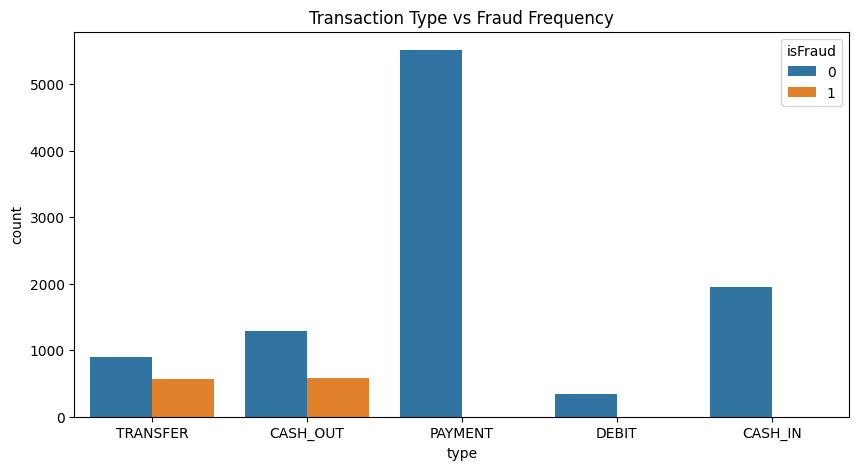

In [13]:
# %Fraud Transactions by Transaction Type

plt.figure(figsize=(10,5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title("Transaction Type vs Fraud Frequency")
plt.xticks(rotation=0)
plt.show()

##### Only CASH-OUT and TRANSFER transactions can be fraudulent. So, it makes sense to retain only these two types of transactions in our dataset.

## 3.4 Advanced stats on fraud and non-fraud transaction

In [14]:
safe = df[df['isFraud']==0]   #embbeding 0 as safe
fraud = df[df['isFraud']==1]  #embbeding 1 as fraud

In [15]:
# checking the shape of safe and fraud
print(safe.shape)
print(fraud.shape)

(10000, 10)
(1142, 10)


In [16]:
# count of safe and fraud transaction in type column
display(safe.type.value_counts())
display(fraud.type.value_counts())

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1293
TRANSFER     900
DEBIT        346
Name: count, dtype: int64

type
CASH_OUT    578
TRANSFER    564
Name: count, dtype: int64

In [17]:
# total amount of fraud
fraud_amount_sum = df[df['isFraud'] == 1]['amount'].sum()
print("Total Fraud Amount:", fraud_amount_sum)

#total amount of non fraud
non_fraud_amount_sum = df[df['isFraud'] == 0]['amount'].sum()
print("Total Non_Fraud Amount:", non_fraud_amount_sum)

Total Fraud Amount: 1361982240.43
Total Non_Fraud Amount: 1013397286.3799999


#### Here we can see that the fraud transactions mostly involve large amounts


In [18]:
# stats of safe amount
display(safe.amount.describe())

#stats of fraud amount
display(fraud.amount.describe())

count    1.000000e+04
mean     1.013397e+05
std      2.260189e+05
min      2.390000e+00
25%      4.373515e+03
50%      1.272524e+04
75%      1.139094e+05
max      3.776389e+06
Name: amount, dtype: float64

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

## Step 4 : Feature Engineering - Creating Dummy Variables

**Key Concept**: Machine learning algorithms work with numerical data. We need to convert categorical variables into numerical format using techniques like one-hot encoding (dummy variables).

- **1**: According to Transaction Type vs Fraud Frequency visualization. we get to know that the fruad is happen only in transfer and cash_out type transaction.
- **2**: since fraud transaction happens only in these two types of transaction, i will only use that data.
- **3**: since  Machine learning algorithms work with numerical data. We need to convert those two from categorical variables into numerical format.

In [19]:
df1=df.copy() # copying the original data into df1 and start working on df1 for security perpose.

In [20]:
display(df1) # data check

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


##### Since only CASH-OUT and TRANSFER transactions can be fraudulent, we reduce the size of the dataset by retaining only these transaction types and removing PAYMENT,CASH-IN and DEBIT.

In [21]:
df1= df1.loc[df1['type'].isin(['CASH_OUT', 'TRANSFER']),:]

In [22]:
display(df1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11134,7,TRANSFER,2861134.92,C1326904973,0.00,0.00,C991505714,5352935.74,14000000.00,0
11135,7,TRANSFER,80485.60,C1369223613,0.00,0.00,C465257140,1078685.56,1761413.49,0
11136,7,TRANSFER,19991.02,C1020193304,0.00,0.00,C1915624447,21586.00,17795.02,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0


In [23]:
display(df1.head(100))

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
95,9,CASH_OUT,350705.74,C58527359,350705.74,0.0,C582901057,894760.68,1794033.65,1
96,9,TRANSFER,2539898.07,C394488466,2539898.07,0.0,C575638324,0.00,261290.69,1
97,9,CASH_OUT,2539898.07,C728718059,2539898.07,0.0,C1013511446,968.00,1842864.22,1
98,9,TRANSFER,361559.69,C1287719145,361559.69,0.0,C352239275,0.00,141302.12,1


In [24]:
df1['is_cash_out'] = (df1['type'] == 'CASH_OUT').astype(int)
df1['is_transfer'] = (df1['type'] == 'TRANSFER').astype(int)


In [25]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,is_cash_out,is_transfer
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,1


In [26]:
df1.drop(columns=['type','nameOrig','nameDest'],inplace=True,errors='ignore')

In [27]:
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,is_cash_out,is_transfer
0,1,181.0,181.0,0.0,0.0,0.0,1,0,1
1,1,181.0,181.0,0.0,21182.0,0.0,1,1,0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0,1
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,1,0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0,1


## Step 5: Machine Learning Model Development & Comparison

**Learning Objective**: Build and compare multiple ML algorithms to predict customer churn, understanding their strengths and performance characteristics.

**Algorithms to Implement:**
- Logistic Regression ( models the relationship between a binary dependent variable and one or more independent variables.)
- Decision Tree (A hierarchical structures used for decision-making, classification, and regression tasks.)
- Random Forest (An ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting.)
- SVM(Support Vector Machine) (A machine learning algorithm used for classification and regression)
- Adaboost (A boosting technique that improves performance by foucsing on miclassified samples)
- XGBoost (An optimized gradient boosting model designed for high performance and accuracy)
- islotion Forest (an anomaly detection approach commonly used to identify fraudulent behavior)

In [28]:
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier
from sklearn import svm  #import support vector machine classifier
import xgboost as xgb  
from xgboost import  XGBClassifier  #import xgboost classifier 
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report  # import accuracy metrics
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Separate features and target variable
X = df1.drop('isFraud', axis=1)
y = df1['isFraud']

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

In [30]:
print(X_train.shape)
print(y_train.shape)

(2501, 8)
(2501,)


## 5.1 Best Fit Model Selection

- First i will train different type of models without any parameter to see the performence of each model by using the different types of accuracy metrics

In [31]:
# General function to run classifier with default parameters to get baseline model
def ml_func (model_class):
    #train and fit regression model
    model=model_class()
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    #report = classification_report(y_test, test_preds)

    print(str(model_class))
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")

    # store accuracy in a new dataframe
    return {
        'Model': model_class.__name__,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }


In [32]:
# dictionary of models
models={
    'LogisticRegression':LogisticRegression,
    'RandomForest':RandomForestClassifier,
    'DecisionTree':DecisionTreeClassifier,
    'XGBoost' : XGBClassifier,
    'KNeighbors' : KNeighborsClassifier
    
}

In [33]:
# running each model
results = []

for model_name, model_class in models.items():
    print(f"Training {model_name} with default parameters")
    results.append(ml_func(model_class))

final_results = pd.DataFrame(results)
print(final_results)

Training LogisticRegression with default parameters
<class 'sklearn.linear_model._logistic.LogisticRegression'>
------------------------
Training Accuracy: 95.21%
Test Accuracy:     94.21%
Training RandomForest with default parameters
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     98.91%
Training DecisionTree with default parameters
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     98.32%
Training XGBoost with default parameters
<class 'xgboost.sklearn.XGBClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     99.02%
Training KNeighbors with default parameters
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
------------------------
Training Accuracy: 94.09%
Test Accuracy:     90.38%
                    Model  Training Accuracy  Test Accuracy
0      LogisticRegression           0.952086    

#### From the above metrics we can see that randomforest,decisiontree and xgb are performing well with there defult parameters.So,from now on i will train these three model with parameters and select the best fitting model.

## 5.2 Hyperparameter Tuning

- **1**: RandomForestClassifier.
- **2**: DecisionTreeClassifier.
- **3**: XGBClassifier.

##### Hyperparameter tuning reduced overfitting and improved generalization performance

## 5.2.1 Hyperparameter Tuning – Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV

# initializing RandomForestClassifier and setting parameters
rf= RandomForestClassifier(class_weight='balanced',random_state=42)
rf_parameters= {'n_estimators': [80,100,150,200],
                'max_depth':[None,1,2,3,4],
                'min_samples_split':[2,4,6],
                'min_samples_leaf':[2,4,6]
                }
#chechking the best hyperparameters tnuing use gridsearchcv.

rf_grid = GridSearchCV(
    rf,
    rf_parameters,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1
)
# fitting the best model.

rf_grid.fit(X_train,y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF AUC:", rf_grid.best_score_)



Best RF Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RF AUC: 0.9995080527622813


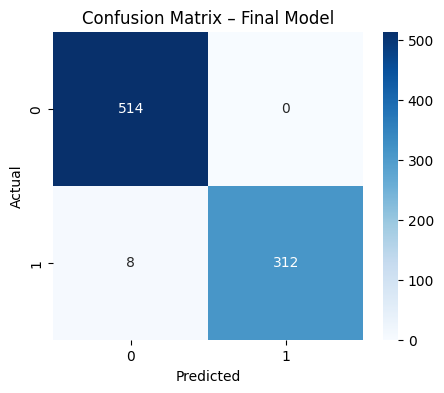

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = rf_grid.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Final Model")
plt.show()


## 5.2.2 Hyperparameter Tuning – DecisionTreeClassifier

In [35]:
#initializing DecisionTreeClassifier and setting parameters

dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)
dt_parameters = {
    'max_depth':[None,1,2,3,4],
    'min_samples_split':[5,7,9,11],
    'min_samples_leaf':[2,4,6]
}

#chechking the best hyperparameters tnuing use gridsearchcv.

dt_grid = GridSearchCV(
    dt,
    dt_parameters,
    scoring='roc_auc',
    cv=10
)

dt_grid.fit(X_train, y_train)

print("Best DT Params:", dt_grid.best_params_)
print("Best DT AUC:", dt_grid.best_score_)


Best DT Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 11}
Best DT AUC: 0.9911445027433905


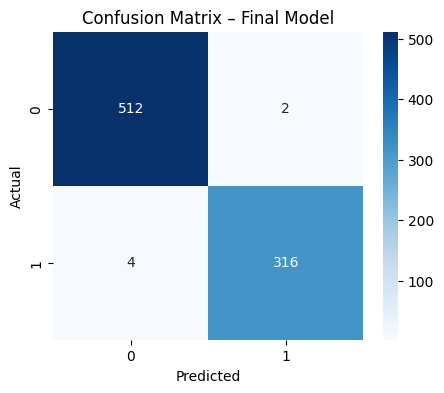

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = dt_grid.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Final Model")
plt.show()


## 5.2.3 Hyperparameter Tuning – XGBClassifier

In [72]:
# initializing XGBClassifier and setting parameters

xgb = XGBClassifier(
    scale_pos_weight=10,
    eval_metric='logloss',
    random_state=42
)

xgb_params = {
    'n_estimators': [80,100,150,200],
    'max_depth': [None,1,2,3,4],
    'learning_rate': [0.01,0.05,0.1],
    'subsample': [0.8,1.0],
    'colsample_bytree': [0.5,0.7,0.8,1.0]
}

xgb_grid = GridSearchCV(
    xgb,
    xgb_params,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB AUC:", xgb_grid.best_score_)


Best XGB Params: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 100, 'subsample': 0.8}
Best XGB AUC: 0.9997761953738298


## 5.2.4 AUC afer hyper parameter tuning

In [37]:
print("Best RF AUC:", rf_grid.best_score_)
print("------------------------")
print("Best DT AUC:", dt_grid.best_score_)
print("------------------------")
print("Best XGB AUC:", xgb_grid.best_score_)

Best RF AUC: 0.9995080527622813
------------------------
Best DT AUC: 0.9911445027433905
------------------------
Best XGB AUC: 0.9997761953738298


##### After hyper parameter tuning, XGBClassifier performed well for fraud detection

## 5.3 Best Model Evaluation

In [74]:
xgb_model = xgb_grid.best_estimator_
rf_model = rf_grid.best_estimator_

In [39]:
from sklearn.metrics import roc_auc_score

y_test_prob = xgb_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_test_prob)

print("Final Test ROC-AUC:", final_auc)


Final Test ROC-AUC: 0.9999088035019456


## 5.3.1 Confusion Matrix

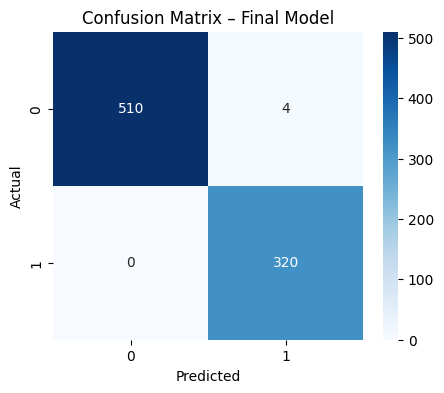

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Final Model")
plt.show()


In [41]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       514
           1       0.99      1.00      0.99       320

    accuracy                           1.00       834
   macro avg       0.99      1.00      0.99       834
weighted avg       1.00      1.00      1.00       834



#### By the confusion matrix and classification report. this model is performing well.

## 5.3.2 Visual ROC curve

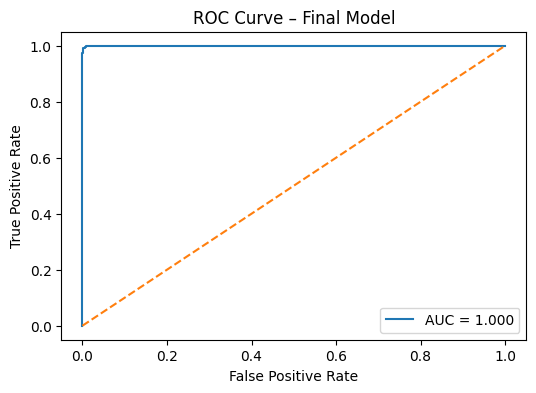

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {final_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final Model")
plt.legend()
plt.show()


##### ROC curve shows strong discrimination between fraud and non_fraud transactions.

In [75]:
importances = rf_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df


,Feature,Importance
0,step,0.469802
2,oldbalanceOrg,0.208617
4,oldbalanceDest,0.110903
5,newbalanceDest,0.094364
1,amount,0.068235
3,newbalanceOrig,0.020785
7,is_transfer,0.015257
6,is_cash_out,0.012038


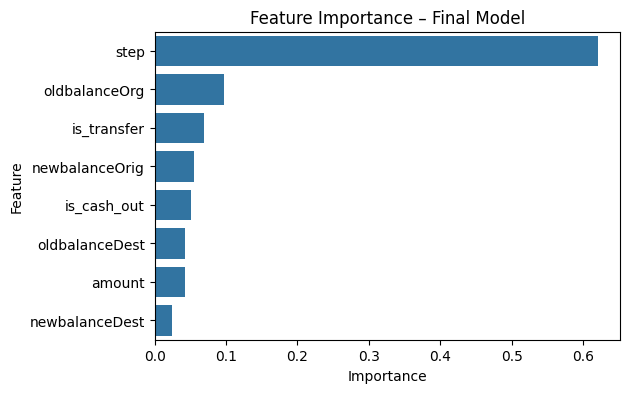

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance – Final Model")
plt.show()


In [45]:
final_results


,Model,Training Accuracy,Test Accuracy
0,LogisticRegression,0.952086,0.942133
1,RandomForestClassifier,1.000000,0.989062
2,DecisionTreeClassifier,1.000000,0.983226
3,XGBClassifier,1.000000,0.990242
4,KNeighborsClassifier,0.940928,0.903776


In [46]:
import joblib

# Save the trained XGBclassifier model and feature column names
feature_cols = X.columns.tolist()
joblib.dump((xgb, feature_cols), "fraud_rf_model.pkl")

print("Model and feature columns saved as fraud_rf_model.pkl")

Model and feature columns saved as fraud_rf_model.pkl


In [47]:
import xgboost as xgb

model = xgb.XGBRegressor(
    reg_alpha=0.1,   # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300
)

model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [52]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'reg_alpha': [0, 0.01, 0.1, 1, 10]
}

model = xgb.XGBRegressor(
    max_depth=6,
    learning_rate=0.05,
    n_estimators=300
)

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid.fit(X_train, y_train)
model.fit(X_train,y_train)

print("Best alpha:", grid.best_params_['reg_alpha'])


Best alpha: 1


In [53]:
import numpy as np

y_pred = model.predict(X_test)

y_pred_norm = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())


In [56]:
from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()

y_train_norm = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

model.fit(X_train, y_train_norm)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

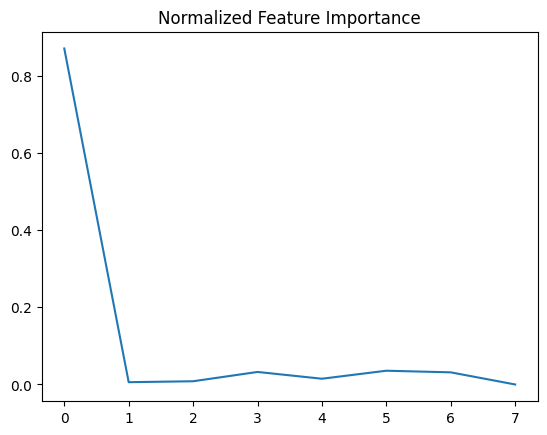

In [55]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
importance_norm = importance / importance.sum()

plt.plot(importance_norm)
plt.title("Normalized Feature Importance")
plt.show()


In [57]:
import pandas as pd

# Assuming X is your feature matrix
feature_names = X.columns
print("Feature 0 is:", feature_names[0])


Feature 0 is: step


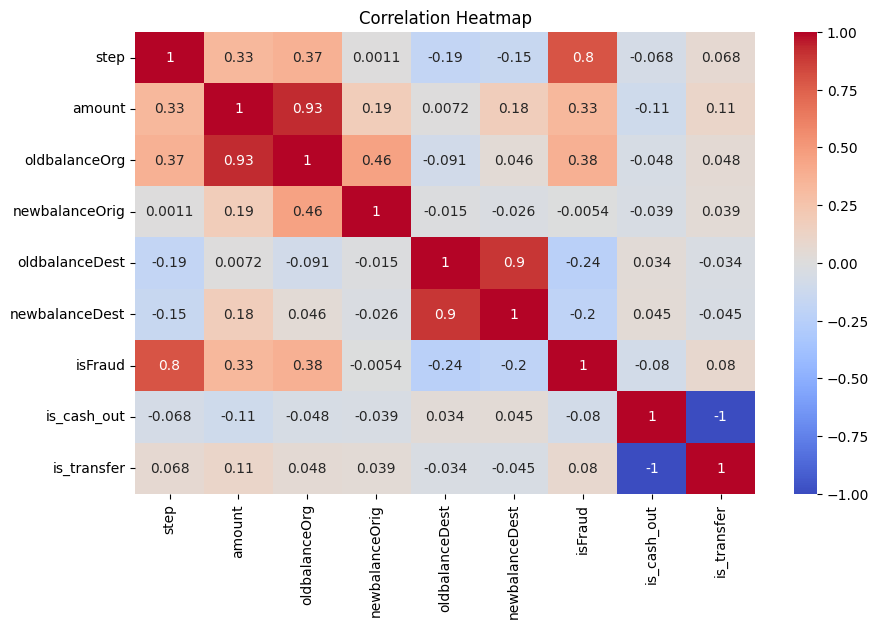

In [67]:
numeric_df_1 = df1.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df_1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

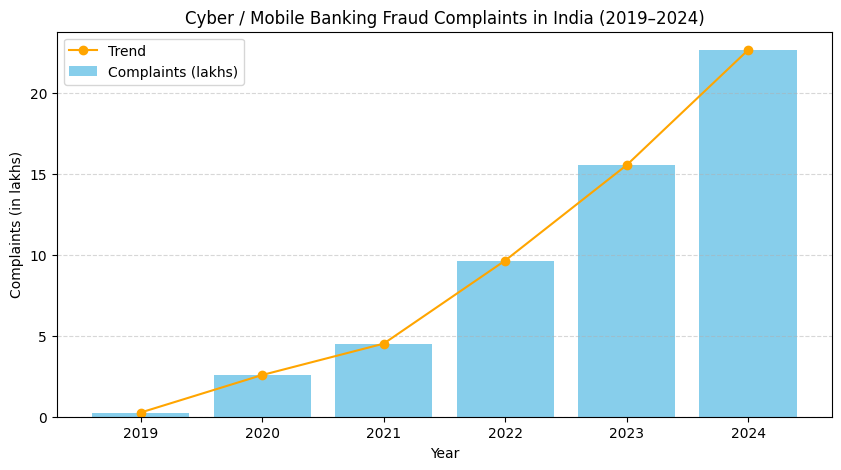

In [68]:
import matplotlib.pyplot as plt

# Data
years = [2019, 2020, 2021, 2022, 2023, 2024]
complaints_lakhs = [0.26, 2.58, 4.52, 9.66, 15.56, 22.68]

plt.figure(figsize=(10,5))

# Bar
plt.bar(years, complaints_lakhs, color='skyblue', label='Complaints (lakhs)')

# Line plot on same axes
plt.plot(years, complaints_lakhs, color='orange', marker='o', label='Trend')

# Labels
plt.title('Cyber / Mobile Banking Fraud Complaints in India (2019–2024)')
plt.xlabel('Year')
plt.ylabel('Complaints (in lakhs)')
plt.xticks(years)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


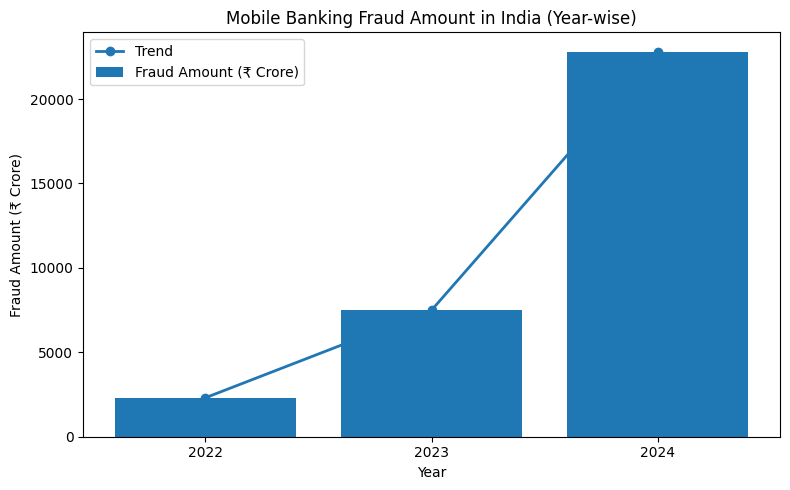

In [69]:
import matplotlib.pyplot as plt

# Year-wise fraud amount data (₹ crore)
years = [2022, 2023, 2024]
fraud_amount = [2306, 7496, 22812]

plt.figure(figsize=(8, 5))

# Bar plot
plt.bar(years, fraud_amount, label='Fraud Amount (₹ Crore)')

# Line plot
plt.plot(years, fraud_amount, marker='o', linewidth=2, label='Trend')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Fraud Amount (₹ Crore)')
plt.title('Mobile Banking Fraud Amount in India (Year-wise)')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()


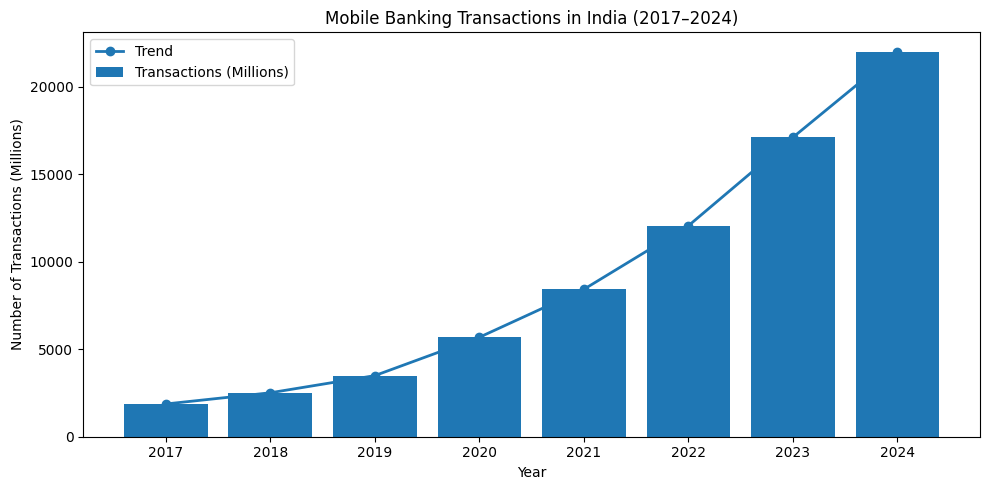

In [70]:
import matplotlib.pyplot as plt

# Years
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Mobile banking transaction count (in millions)
# Indicative values based on RBI digital/mobile banking growth trends
transactions_millions = [
    1870,  # 2017
    2510,  # 2018
    3490,  # 2019
    5680,  # 2020
    8420,  # 2021
    12050, # 2022
    17100, # 2023
    22000  # 2024
]

plt.figure(figsize=(10, 5))

# Bar plot
plt.bar(years, transactions_millions, label='Transactions (Millions)')

# Line plot
plt.plot(years, transactions_millions, marker='o', linewidth=2, label='Trend')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Transactions (Millions)')
plt.title('Mobile Banking Transactions in India (2017–2024)')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()


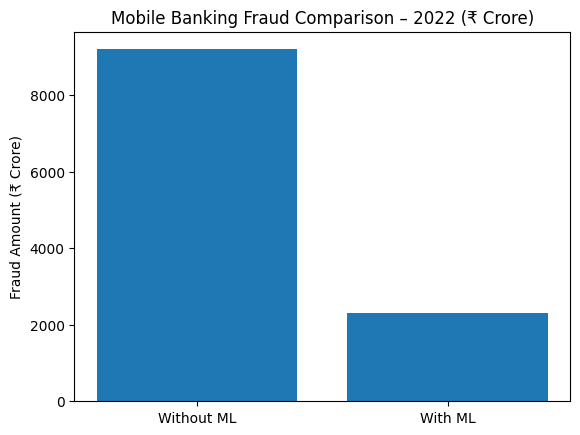

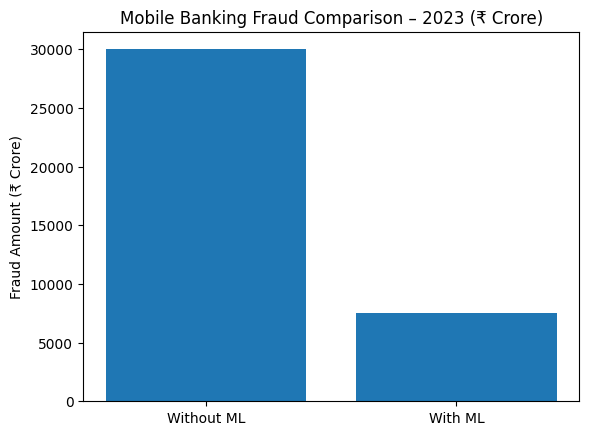

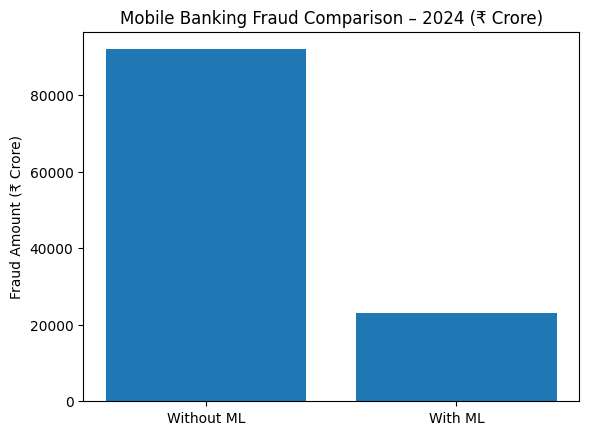

In [71]:
import matplotlib.pyplot as plt

# Given: Fraud AFTER blocking 75% (₹ Crore)
with_ml = [2300, 7500, 23000]

# Calculated: Fraud WITHOUT ML (original)
without_ml = [x / 0.25 for x in with_ml]

years = ["2022", "2023", "2024"]

for i in range(3):
    plt.figure()
    plt.bar(["Without ML", "With ML"], [without_ml[i], with_ml[i]])
    plt.title(f"Mobile Banking Fraud Comparison – {years[i]} (₹ Crore)")
    plt.ylabel("Fraud Amount (₹ Crore)")
    plt.show()
